# Toán Cho Trí Tuệ Nhân Tạo
Lab 03: Giải Bài Toán Tô Màu Bằng Phương Pháp Phân Hoạch Đồ Thị  
Học Viên:
Phạm Minh Thạch - 22C15018  
Nguyễn Thị Hoàng Trang - 22C15045

### Thuật toán phân hoạch trên đồ thị

Trong đoạn chương trình bên dưới, hàm connected_components nhận vào một đồ thị và trả về danh sách các thành phần liên thông trong đồ thị. Hàm dfsvisit nhận vào một đỉnh và trả về thành phần liên thông xuất phát từ đỉnh đó.

In [1]:
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        self.distance = 0
        self.prevNode = None
        self.visited = False
        self.discovery = 0
        self.finish = 0

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getDistance(self):
        return self.distance

    def getVisited(self):
        return self.visited

    def getPrev(self):
        return self.prevNode

    def getWeight(self,nbr):
        return self.connectedTo[nbr]

    def setDistance(self,d = 0):
        self.distance = d

    def setPrev(self,prev = None):
        self.prevNode = prev

    def setVisited(self, status):
        self.visited = status

    def setDiscovery(self,d = 0):
        self.discovery = d

    def setFinish(self,d = 0):
        self.finish = d

class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0


    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex


    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None


    def __contains__(self,n):
        return n in self.vertList


    def addEdge(self,f,t,weight=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], weight)


    def getVertices(self):
        return self.vertList.keys()


    def __iter__(self):
        return iter(self.vertList.values())

class DFSGraph(Graph):
  def __init__(self):
    super().__init__()
    self.time = 0

  def connected_components(self):
      for aVertex in self:
          aVertex.setVisited(False)
          aVertex.setPrev(-1)
          
      components = []
      for aVertex in self:
          print(aVertex)
          if aVertex.getVisited() == False:
              component = []
              self.dfsvisit(aVertex, component)
              components.append(component)
      
      return components

  def dfsvisit(self, startVertex, component):
      startVertex.setVisited(True)
      component.append(startVertex.getId())
      for nbr in startVertex.getConnections():
          if nbr.getVisited() == False:
              nbr.setPrev(startVertex)
              self.dfsvisit(nbr, component)
      startVertex.setVisited(True)

In [3]:
g = DFSGraph()
g.addEdge('A', 'B')
g.addEdge('A', 'C')
g.addEdge('B', 'D')
g.addEdge('B', 'E')
g.addEdge('C', 'F')
g.addEdge('C', 'G')
g.addEdge('D', 'H')
g.addEdge('E', 'I')
g.addEdge('F', 'J')
g.addEdge('G', 'K')
g.addEdge('W', 'T')

# Perform a DFS starting at first vertex ('A')
# Return list of connected components from graph 
components = g.connected_components() 

# Print the components (In this example there are 2 components)
print(components)

A connectedTo: ['B', 'C']
B connectedTo: ['D', 'E']
C connectedTo: ['F', 'G']
D connectedTo: ['H']
E connectedTo: ['I']
F connectedTo: ['J']
G connectedTo: ['K']
H connectedTo: []
I connectedTo: []
J connectedTo: []
K connectedTo: []
W connectedTo: ['T']
T connectedTo: []
[['A', 'B', 'D', 'H', 'E', 'I', 'C', 'F', 'J', 'G', 'K'], ['W', 'T']]


### Giải bài toán tô màu bằng phương pháp phân hoạch đồ thị

In [1]:
from lab03 import *

In [2]:
def colorize(img):
    gray_img = convert_to_grayscale(img)
    binary_matrix = convert_to_binary_matrix(gray_img)
    label_matrix, n_color = convert_to_label_matrix(binary_matrix)
    color_matrix = convert_to_color_matrix(label_matrix, n_color)
    color_matrix = convert_to_color_image(color_matrix)
    return color_matrix

In [8]:
def fill_and_show(path):
    img_old = load_image(path)
    img_new = colorize(img_old)

    show_side_by_side(img_old, img_new)

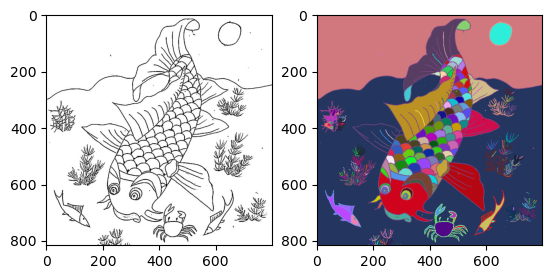

In [10]:
fill_and_show('input/fish.jpg')

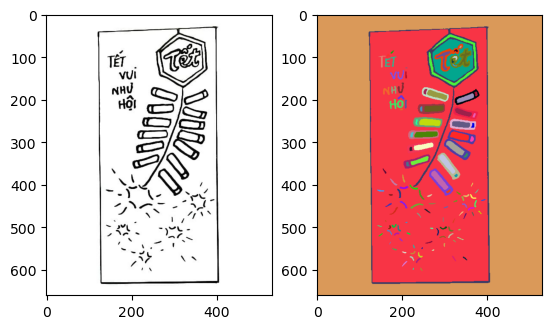

In [15]:
fill_and_show('input/card.jpg')

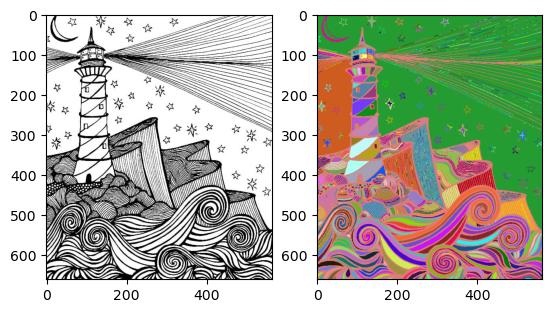

In [26]:
fill_and_show('input/lighthouse.jpg')

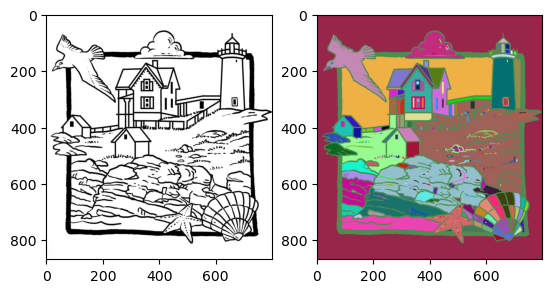

In [28]:
fill_and_show('input/beach.jpg')

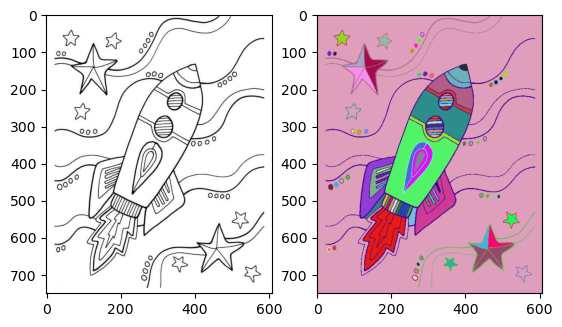

In [62]:
fill_and_show('input/galaxy.jpg')